In [ ]:
import matplotlib.pyplot as plt

import icepack as ice
import scipy
import numpy as np
from importlib import reload

In [2]:
mat = scipy.io.loadmat('./icepack2.mat')
prior_aicen = mat['prior_aicen']
prior_vicen = mat['prior_vicen']
a_array = prior_aicen[:,:,1].T
v_array = prior_vicen[:,:,1].T
h_bnd = ice.HeightBounds([0, 0.64450721681942580, 1.3914334975763036, 2.4701793819598885, 4.5672879188504911, 9.3338418158681744])
print(f'{"low":<10s}high')
print(*(f'{i[0]:<10f}{i[1]}' for i in h_bnd.intervals), sep='\n')

low       high
0.000000  0.6445072168194258
0.644507  1.3914334975763036
1.391433  2.4701793819598885
2.470179  4.567287918850491
4.567288  9.333841815868174


In [3]:
real_raw_ensemble = ice.RawEnsemble(samples=[ice.RawSample(area=a_array[i], volume=v_array[i], snow=np.zeros(a_array.shape[1])) for i in range(len(a_array))])
real_raw_sample = real_raw_ensemble.samples[0]
real_raw_ensemble;
real_raw_sample;

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 50
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

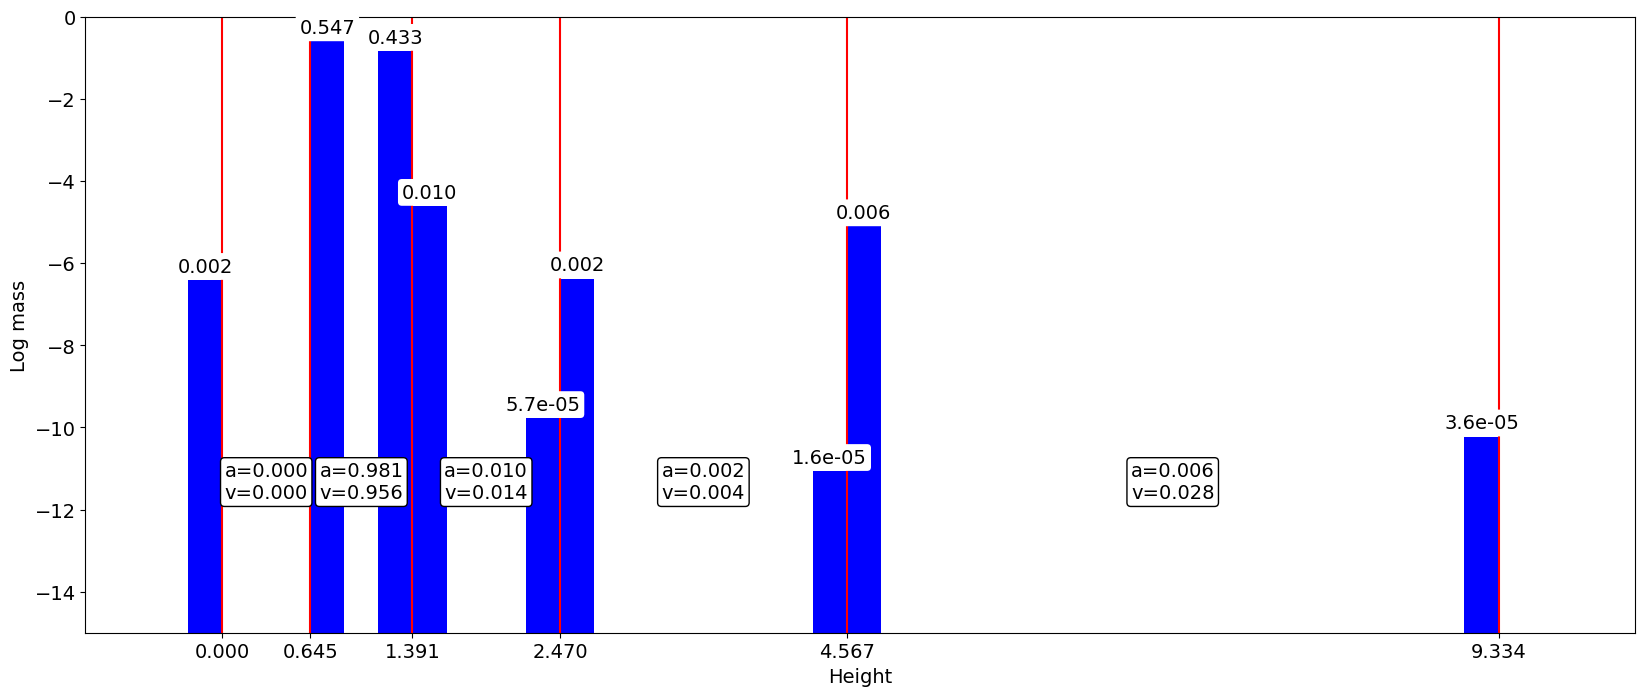

In [5]:
reload(ice)
real_sample = ice.process_sample(real_raw_sample, h_bnd)
v = ice.Visualisation(h_bnd)
v.show_sample(real_sample)
# v.ax.set_title('Delta Representation of Sample', fontsize=25)
assert np.allclose(ice.post_process_sample(real_sample, h_bnd).area, real_raw_sample.area, atol=1e-8)

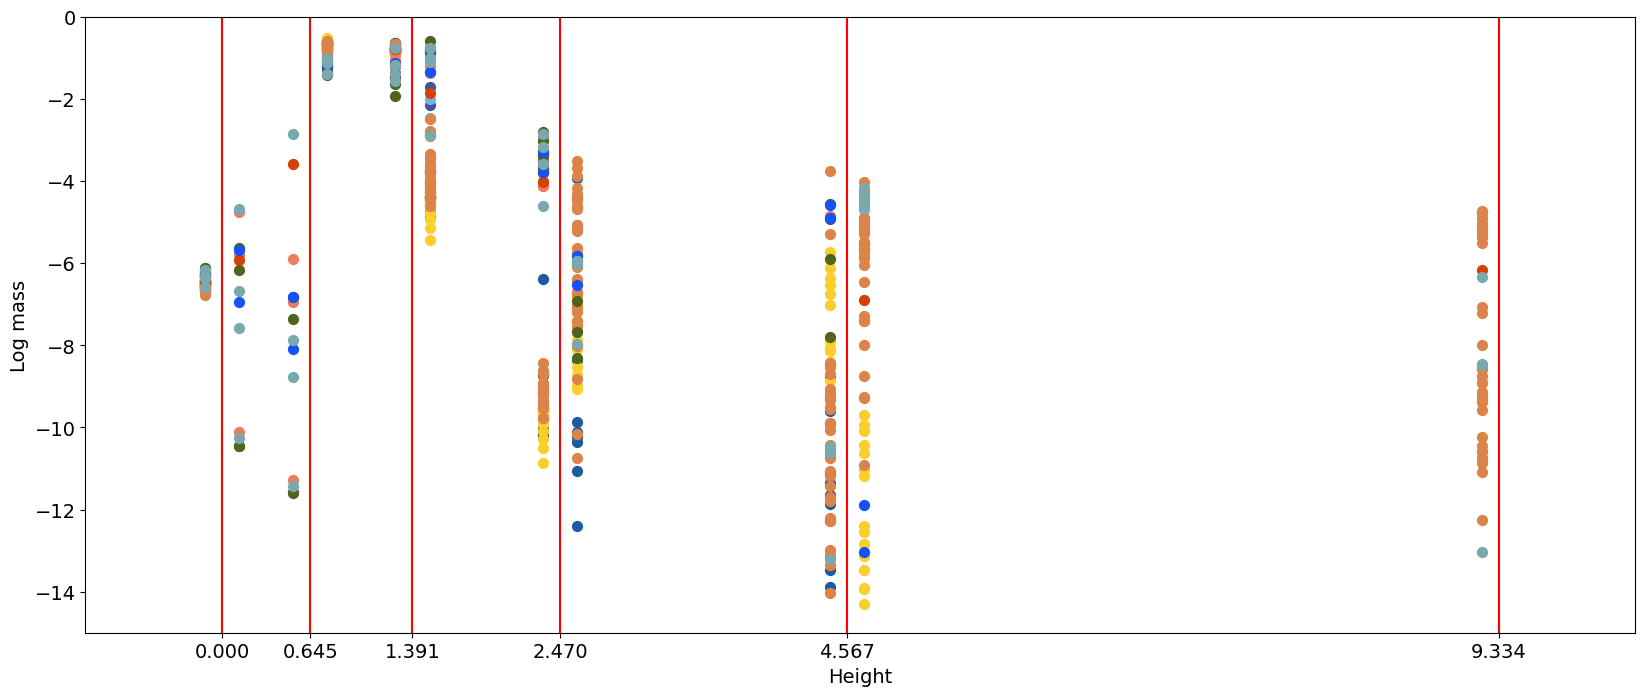

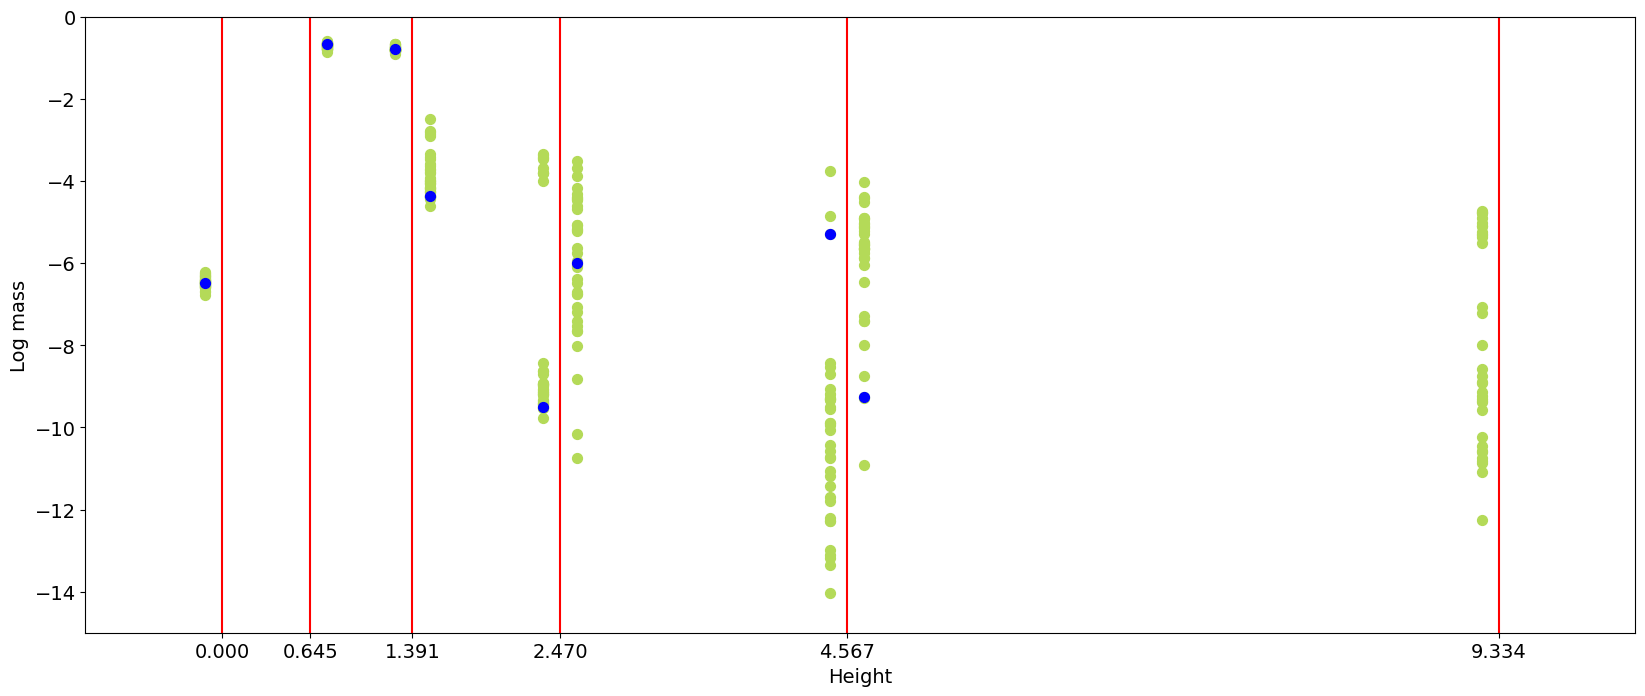

In [19]:
reload(ice)
real_ensemble = ice.process_ensemble(real_raw_ensemble, h_bnd)
ice.Visualisation(h_bnd).show_ensemble(real_ensemble)
v = ice.Visualisation(h_bnd)
v.show_class_ensemble(real_ensemble.class_ensembles[4])
for idx in [15]:
    v.add_sample(real_ensemble.class_ensembles[4].samples[idx], style='scatter', dot_size=50)
# [s.visualize(h_bnd) for s in real_ensemble.samples[:10]]  # show 10 visualizations

/home/oscar/grooms/icepack.py:165: RuntimeWarning: divide by zero encountered in log
  y_lims = np.maximum(np.log(cd.errorbars()), self.bottom)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.967482142328423


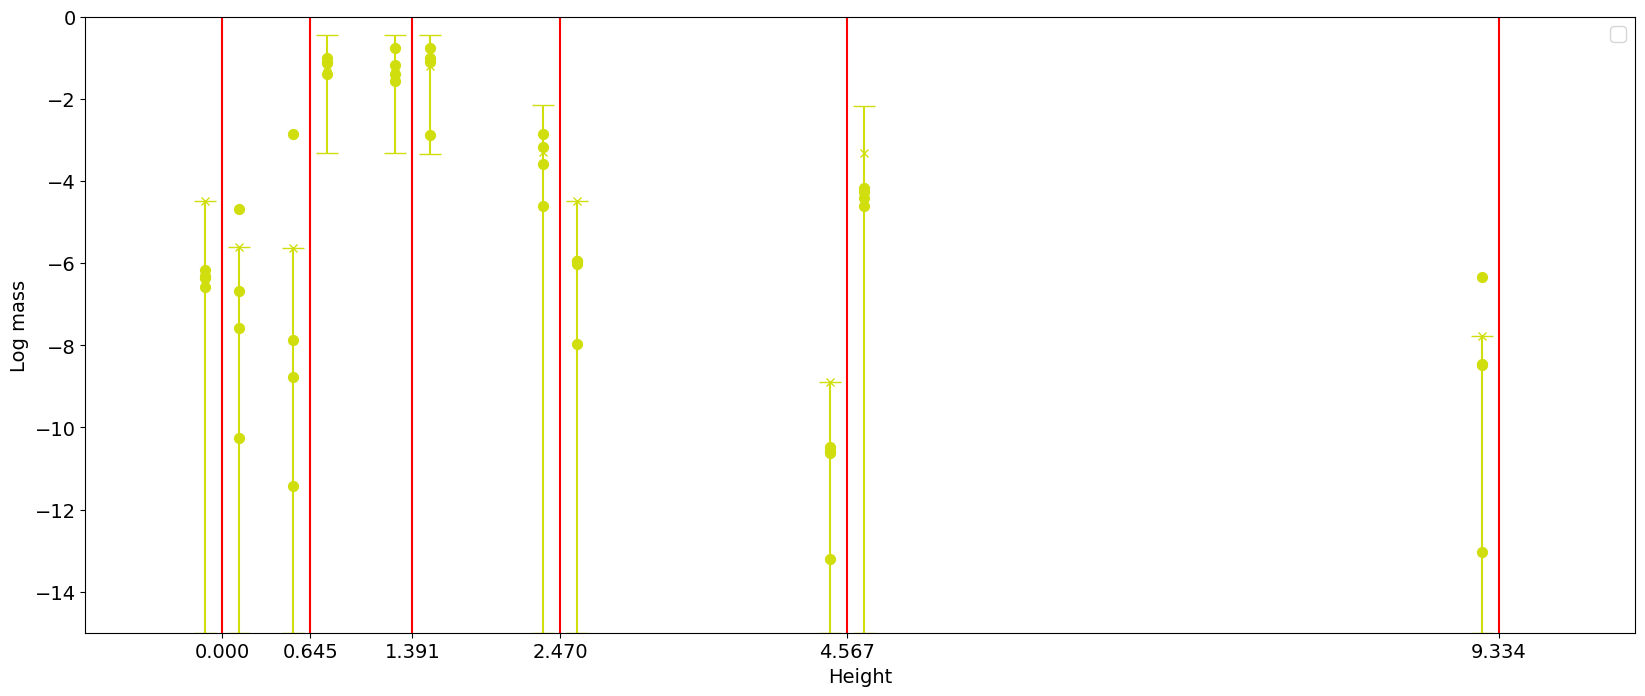

In [92]:
reload(ice)
real_class_ensemble = real_ensemble.class_ensembles[-1]  # -1 looks good
real_class_dirichlet = ice.fit_dirichlet(real_class_ensemble)
v = ice.Visualisation(h_bnd)
# v.show_class_dirichlet(real_class_dirichlet)
v.show_dirichlet_plus_samples(real_class_ensemble, real_class_dirichlet)
print(real_class_dirichlet.alpha.sum())

In [83]:
alpha = real_class_dirichlet.alpha
scipy.stats.beta(alpha[6], sum(alpha)-alpha[6]).sf(np.exp(-4))

0.0023860676897354298

[2.74163217e-03 1.40237490e+00 4.93796741e-01 7.63257752e-03
 3.61276389e-04 9.96563279e-04 2.71737843e-03 1.31555183e-04]
[0.02094516 0.02073755 0.00749809 3.09852279 3.22440863 0.56703073
 0.17045672]


/home/oscar/grooms/icepack.py:165: RuntimeWarning: divide by zero encountered in log
  y_lims = np.maximum(np.log(cd.errorbars()), self.bottom)


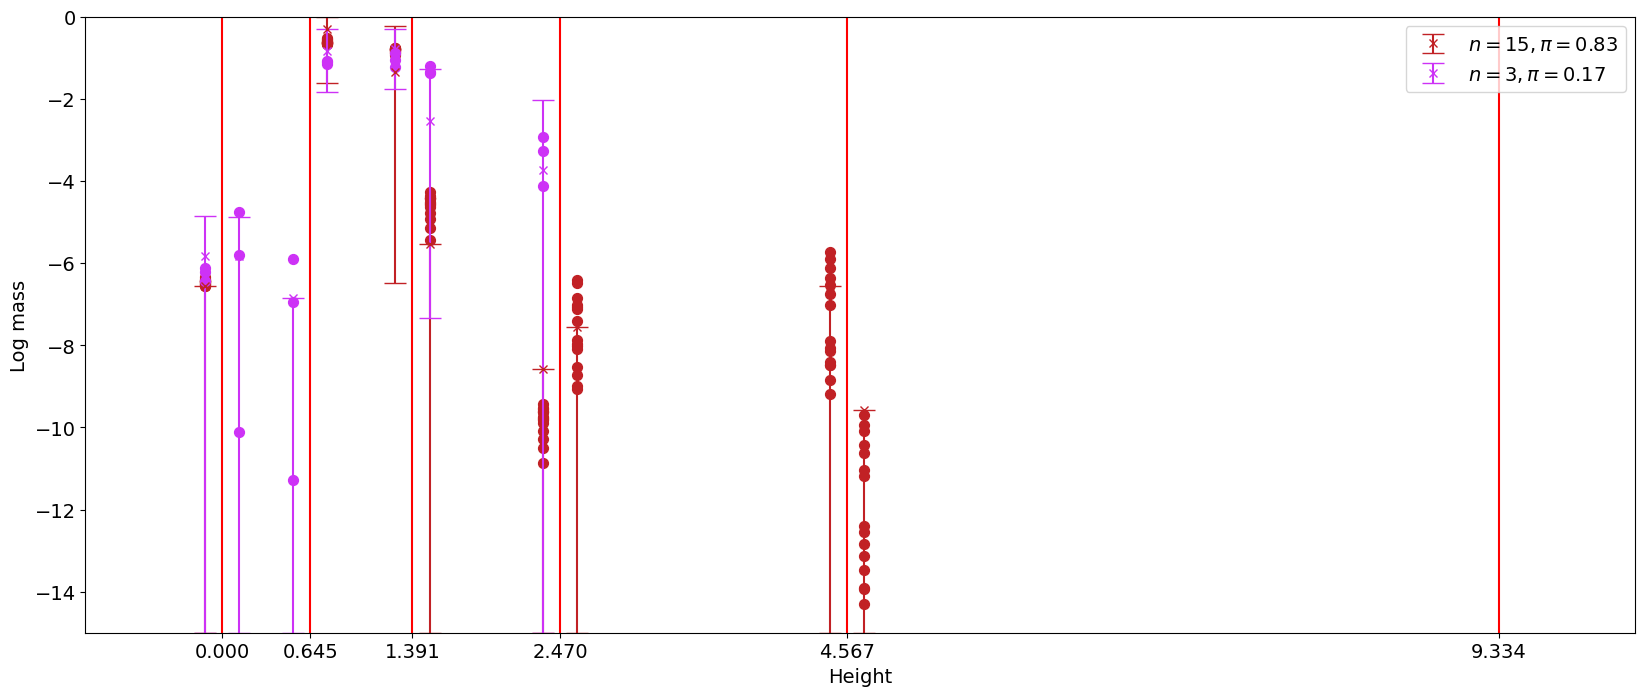

In [74]:
reload(ice)
reduced_ensemble = ice.Ensemble(samples=real_ensemble.class_ensembles[3].samples+real_ensemble.class_ensembles[5].samples)
reduced_mixed_dirichlet = ice.fit_mixed_dirichlet(reduced_ensemble)
# print(real_mixed_dirichlet.mixing_rates * 79)
v = ice.Visualisation(h_bnd)
v.show_mixed_dirichlet_plus_samples(reduced_ensemble, reduced_mixed_dirichlet)
s1 = reduced_ensemble.samples[0]
high_sample = reduced_ensemble.class_ensembles[1].samples[2]
# v.add_sample(high_sample, style='scatter', dot_size=100)
# v.add_sample(s1, style='scatter', color='black', dot_size=100)


In [37]:
ice.uniformize_sample(high_sample, reduced_mixed_dirichlet)

UniformSample([0.97531285, 0.97207564, 0.97447007, 0.30831167, 0.05076292,
               0.37538887, 0.88412131, 0.19356633, 0.69603284, 0.94192983,
               0.38509123])

In [48]:
alpha = reduced_mixed_dirichlet.dirichlets[0].alpha
alpha

Sample([2.74163217e-03, 1.40237490e+00, 4.93796741e-01, 7.63257752e-03,
        3.61276389e-04, 9.96563279e-04, 2.71737843e-03, 1.31555183e-04])

In [69]:
np.log(0.002)

-6.214608098422191

In [44]:
ice.uniformize_sample(reduced_ensemble.class_ensembles[0].samples[0], reduced_mixed_dirichlet)

UniformSample([0.9741497 , 0.12928868, 0.94178391, 0.21667818, 0.05445765,
               0.35797989, 0.9127408 , 0.74045754, 0.04668509, 0.47680997,
               0.10939427])

In [ ]:
u1 = ice.uniformize_sample(s1, reduced_mixed_dirichlet)
u1

In [ ]:
print(s1[0])
ice.update_x0(u1[0], reduced_mixed_dirichlet, ice.Observation(n=10, k=1))


In [ ]:
reload(ice)
'''
for i,s in enumerate(reduced_ensemble.samples):
    try:
        ice.uniformize_sample(s, reduced_mixed_dirichlet)
    except BaseException as e:
        print('failed to uniformize: ', i, s)
        raise e
'''
s2 = reduced_ensemble.samples[2]
u2 = ice.uniformize_sample(reduced_ensemble.samples[2], reduced_mixed_dirichlet)
s2

In [ ]:
u0s = np.array([us[7] for us in ice.uniformize_ensemble(reduced_ensemble, reduced_mixed_dirichlet).samples])
plt.hist(u0s, density=True, bins='auto')

In [ ]:
y = ice.Observation(n=100, k=1)
ice.update_sample(u1, reduced_mixed_dirichlet, y)

In [ ]:
s1

In [ ]:
post_ensemble = ice.update_ensemble(ice.uniformize_ensemble(reduced_ensemble, reduced_mixed_dirichlet), reduced_mixed_dirichlet, y)
# post_raw_ensemble = ice.post_process_ensemble(post_ensemble, h_bnd)
ice.Visualisation(h_bnd).show_ensemble(post_ensemble)

In [84]:
real_ensemble

Ensemble(samples=[Sample([1.63821209e-03, 0.00000000e+00, 0.00000000e+00, 5.47116636e-01,
        4.33444270e-01, 9.94489050e-03, 5.66875187e-05, 1.69885108e-03,
        1.56244732e-05, 6.04862265e-03, 3.62062136e-05]), Sample([1.46318893e-03, 0.00000000e+00, 0.00000000e+00, 5.32578146e-01,
        4.39929269e-01, 1.22938622e-02, 7.98588136e-05, 2.60436111e-03,
        2.52440937e-05, 1.09564921e-02, 6.95775980e-05]), Sample([1.91973643e-03, 9.63140513e-04, 3.04737576e-04, 3.00676837e-01,
        2.52281193e-01, 4.09693566e-01, 2.25402289e-02, 1.46187145e-03,
        1.01565199e-02, 2.16977578e-06, 0.00000000e+00]), Sample([1.81948132e-03, 0.00000000e+00, 0.00000000e+00, 4.76290405e-01,
        4.47515165e-01, 3.29712379e-02, 3.28080827e-02, 1.18120705e-03,
        4.59150480e-06, 7.25002861e-03, 1.59800334e-04]), Sample([1.50960566e-03, 0.00000000e+00, 0.00000000e+00, 5.68585103e-01,
        4.22350428e-01, 7.47864580e-03, 3.75730703e-05, 3.15988347e-05,
        7.04521120e-06, 0.0000

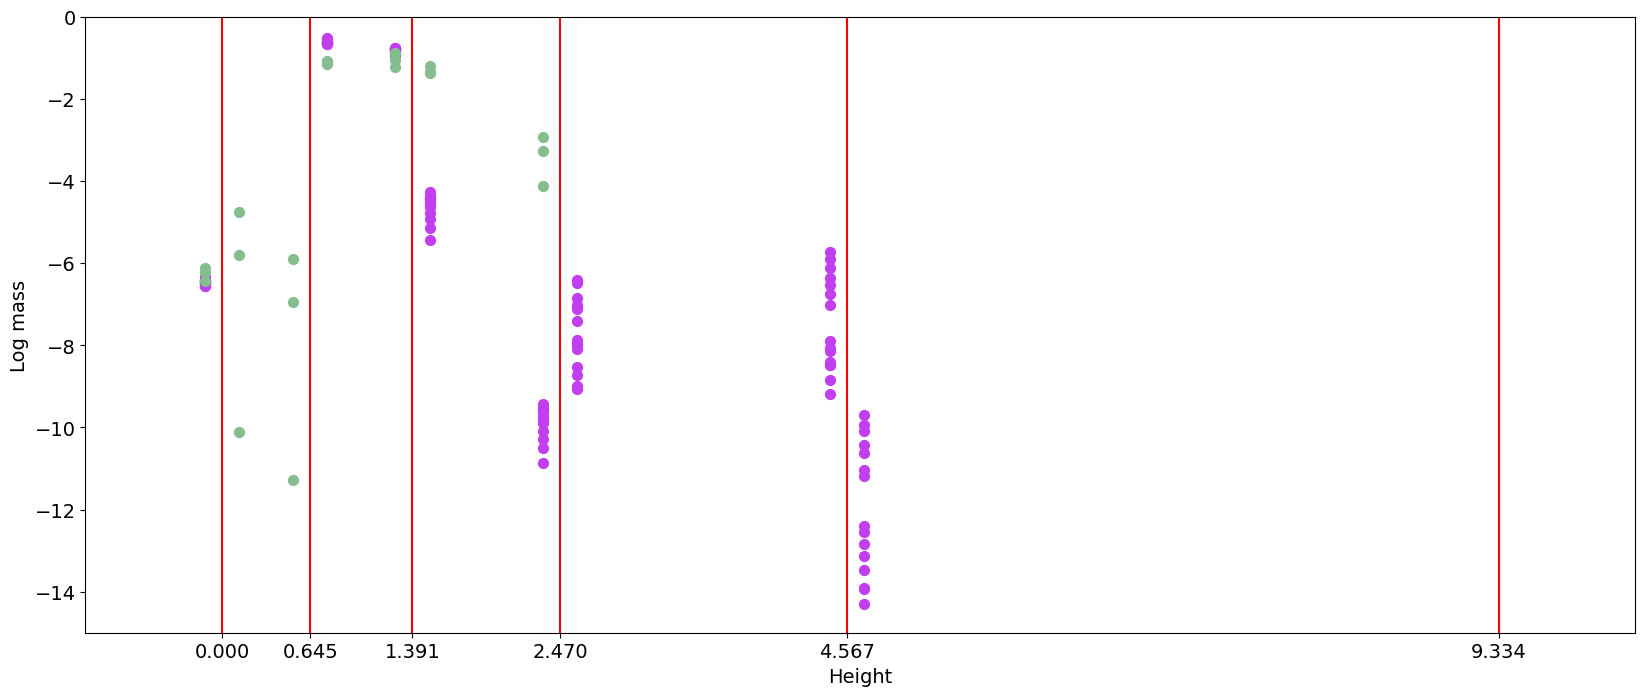

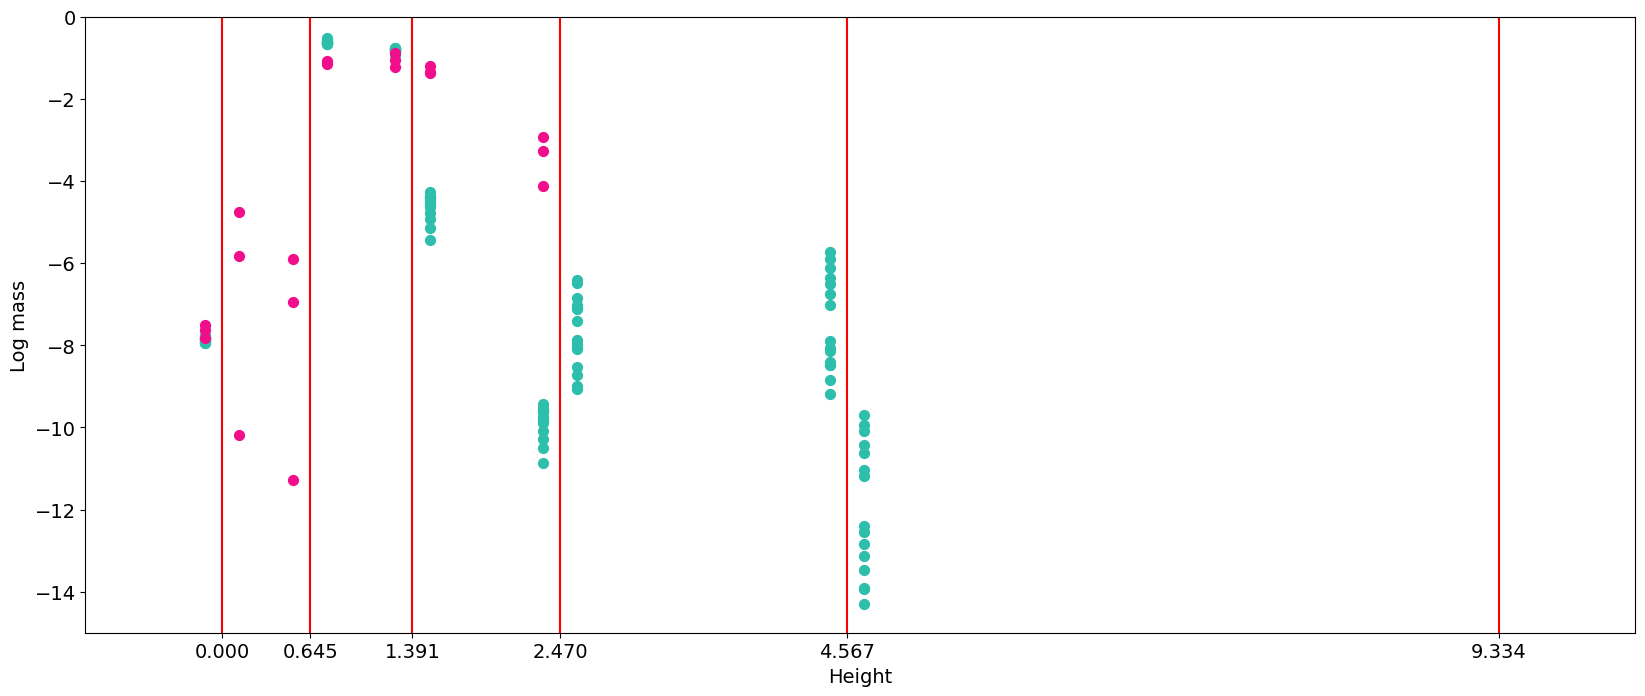

In [96]:
reload(ice)
e = reduced_ensemble
ice.Visualisation(h_bnd).show_ensemble(e)
post_ensemble = ice.transport_ensemble(e, ice.Observation(n=10, r=0))
ice.Visualisation(h_bnd).show_ensemble(post_ensemble)

